# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 13.12.2022

Мягкий дедлайн: 20.12.2022 23:59 MSK

Жёсткий дедлайн: 20.12.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [56]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [57]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [59]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

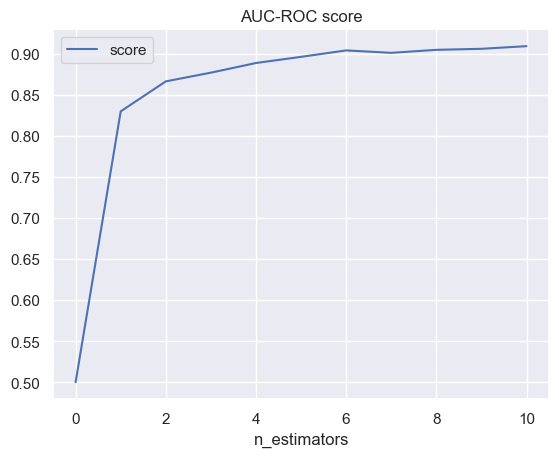

CPU times: user 1.13 s, sys: 8.95 ms, total: 1.14 s
Wall time: 966 ms
Train ROC-AUC 0.9893
Valid ROC-AUC 0.9090
Test ROC-AUC 0.9171


In [61]:
boosting = Boosting(plot=True)

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [62]:
depths = range(1, 30, 2)
train_scores = []
test_scores = []

for depth in depths:   
    boosting = Boosting(plot=False, base_model_params={"max_depth" : depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_scores.append(boosting.score(x_train, y_train))
    test_scores.append(boosting.score(x_test, y_test))

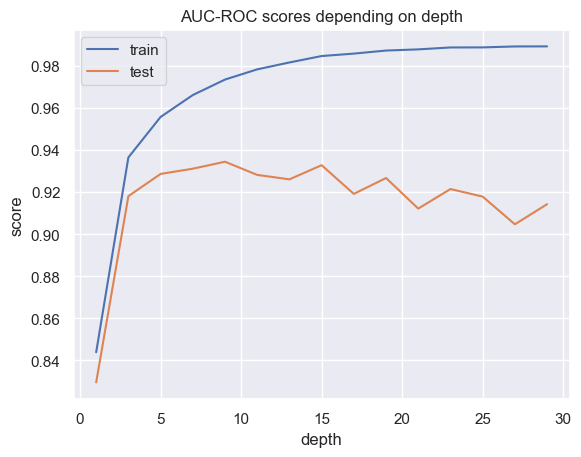

In [63]:
plt.plot(depths, train_scores, label="train")
plt.plot(depths, test_scores, label="test")
plt.legend()
plt.title("AUC-ROC scores depending on depth")
plt.ylabel("score")
plt.xlabel("depth")
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Из графика видно, что та у которой глубина ~ 8, так как у нее лучшее качество на тесте. Так происходит потому что наш бустинг переобучается с ростом максимальной глубины базовой модели. Это согласуется с теорией, обсуждали на лекции. При этом если слишком неглубокие деревья базовые, то не хватает мощности.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [64]:
import optuna

In [65]:
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 1, 100, log=True)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1, log=True)
    subsample = trial.suggest_float("subsample", 0.2, 1, log=True)
    max_depth = trial.suggest_int("max_depth", 1, 32, log=True)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 32, log=True)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 32, log=True)
    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2", None])

    boosting = Boosting(plot=False, n_estimators=n_estimators,
                        learning_rate=learning_rate, subsample=subsample,
                        base_model_params={ "max_depth" : depth,
                                            "min_samples_split" : min_samples_split,
                                            "min_samples_leaf" : min_samples_leaf,
                                            "max_features" : max_features
                                            })

    boosting.fit(x_train, y_train, x_valid, y_valid)

    score = boosting.score(x_valid, y_valid)
    return score



study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2022-12-20 18:13:22,342] A new study created in memory with name: no-name-5955877e-3bea-43a4-90ea-245ca9407de5
[I 2022-12-20 18:13:27,462] Trial 0 finished with value: 0.937526789284765 and parameters: {'n_estimators': 51, 'learning_rate': 0.4954934848868722, 'subsample': 0.25179928623886083, 'max_depth': 10, 'min_samples_split': 30, 'min_samples_leaf': 12, 'max_features': None}. Best is trial 0 with value: 0.937526789284765.
[I 2022-12-20 18:13:27,517] Trial 1 finished with value: 0.9119954535041781 and parameters: {'n_estimators': 1, 'learning_rate': 0.6941031166111372, 'subsample': 0.4872910732523519, 'max_depth': 25, 'min_samples_split': 15, 'min_samples_leaf': 16, 'max_features': None}. Best is trial 0 with value: 0.937526789284765.
[I 2022-12-20 18:13:27,653] Trial 2 finished with value: 0.9219409131145173 and parameters: {'n_estimators': 4, 'learning_rate': 0.06138847035231574, 'subsample': 0.20922682697691605, 'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 10,

FrozenTrial(number=32, values=[0.9432079135846517], datetime_start=datetime.datetime(2022, 12, 20, 18, 15, 35, 796265), datetime_complete=datetime.datetime(2022, 12, 20, 18, 15, 42, 886640), params={'n_estimators': 63, 'learning_rate': 0.6749167033343225, 'subsample': 0.48009033553165825, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}, distributions={'n_estimators': IntDistribution(high=100, log=True, low=1, step=1), 'learning_rate': FloatDistribution(high=1.0, log=True, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=True, low=0.2, step=None), 'max_depth': IntDistribution(high=32, log=True, low=1, step=1), 'min_samples_split': IntDistribution(high=32, log=True, low=2, step=1), 'min_samples_leaf': IntDistribution(high=32, log=True, low=2, step=1), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2', None))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=32, state=TrialState.COMPLETE, valu

In [67]:
study.best_trial.params

{'n_estimators': 63,
 'learning_rate': 0.6749167033343225,
 'subsample': 0.48009033553165825,
 'max_depth': 26,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'sqrt'}

In [66]:
#сохраняем самые лучше параметры

boosting = Boosting(plot=False, n_estimators=study.best_trial.params["n_estimators"],
                        learning_rate=study.best_trial.params["learning_rate"], subsample=study.best_trial.params["subsample"],
                        base_model_params={ "max_depth" : study.best_trial.params["max_depth"],
                                            "min_samples_split" : study.best_trial.params["min_samples_split"],
                                            "min_samples_leaf" : study.best_trial.params["min_samples_leaf"],
                                            "max_features" : study.best_trial.params["max_features"]
                                            })

boosting.fit(x_train, y_train, x_valid, y_valid)

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [54]:
def plot_calibration_curve(y_test, preds, name):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) 
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    #plt.xlim([-0.05, 1.05])
    plt.grid()
    plt.title(name)
    plt.xlabel("mean predicted probability")
    plt.ylabel("fraction of positives")
    plt.show()

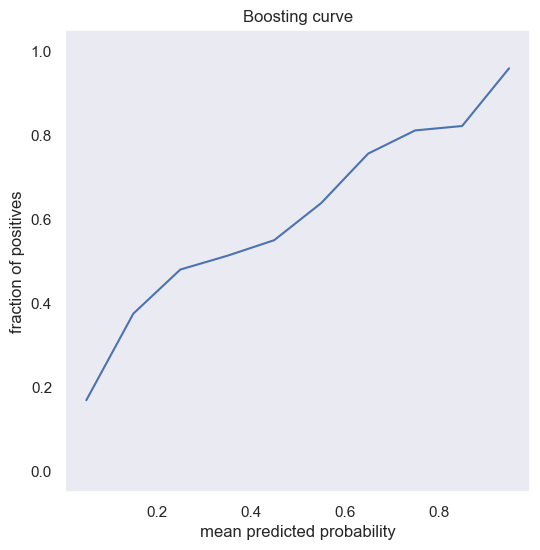

In [55]:
test_preds_boosting = boosting.predict_proba(x_test)[:, 1]
plot_calibration_curve(y_test, test_preds_boosting, "Boosting curve")

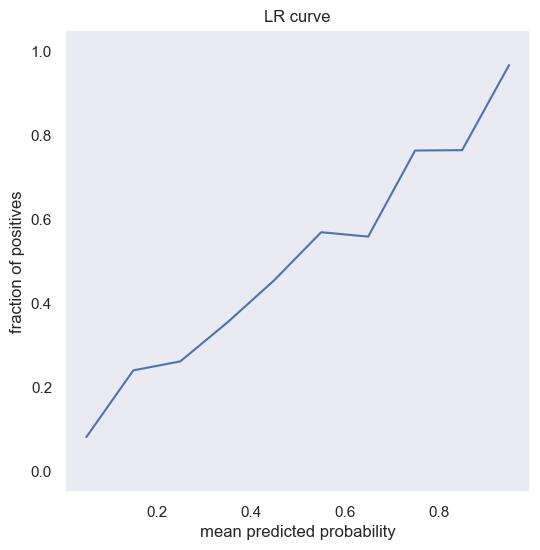

In [22]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=100000).fit(x_train, y_train)
plot_calibration_curve(y_test, LR.predict_proba(x_test)[:, 1], "LR curve")

Ну видно, что GB похуже предсказывает вероятности, чем LR. Наверное это потому что там деревья испоьлзуются в качестве базовых моделей и непрерывность теряется, что может быть плохо для определения вероятностей

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

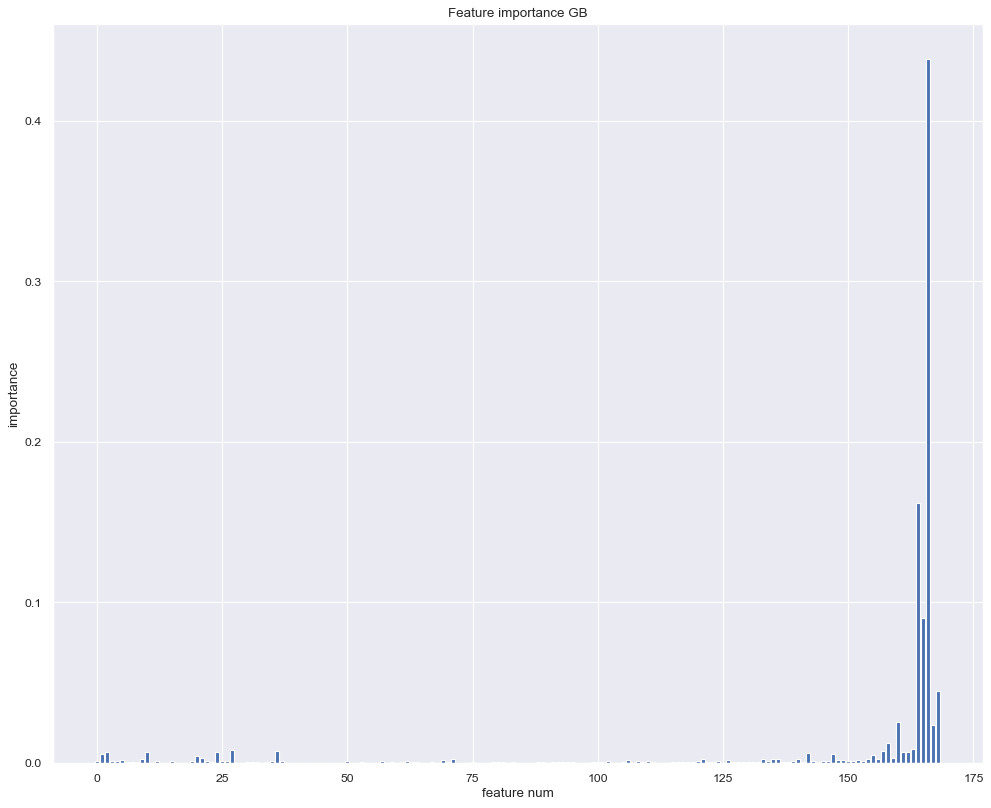

In [88]:
from matplotlib.pyplot import figure
figure(figsize=(15,12), dpi=80)
fi = boosting.feature_importances_
plt.title("Feature importance GB")
plt.xlabel("feature num")
plt.ylabel("importance")
plt.bar(range(len(fi)), fi)
plt.show()

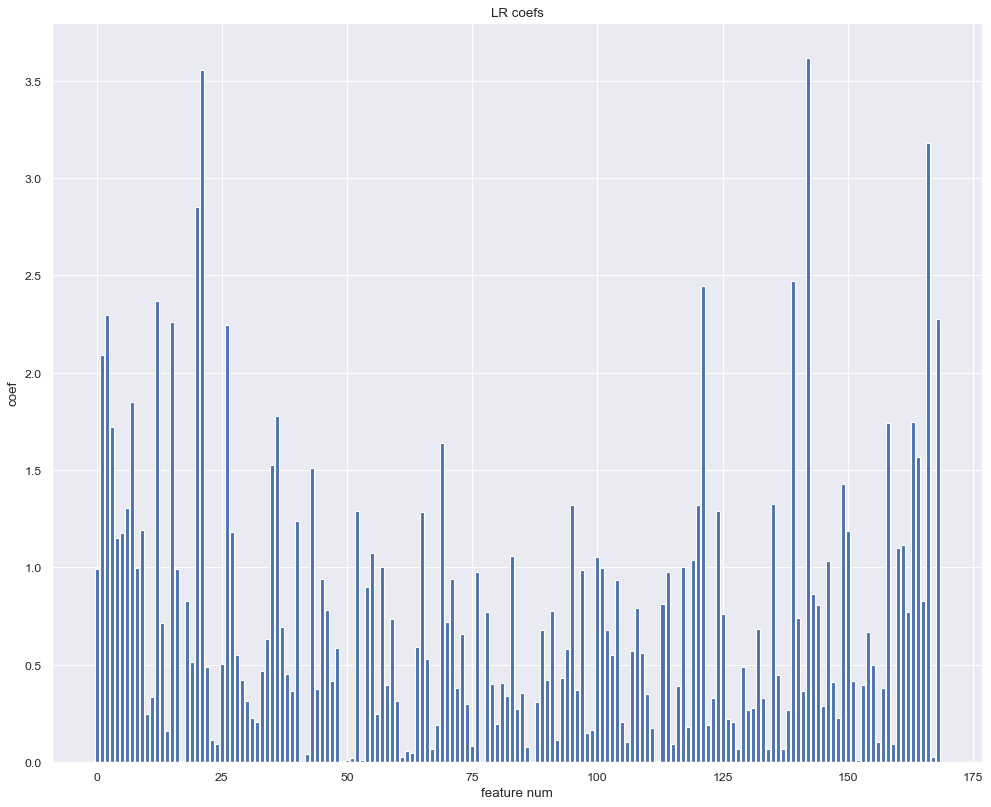

In [86]:
figure(figsize=(15,12), dpi=80)
c = np.abs(LR.coef_.reshape((-1,)))
plt.title("LR coefs")
plt.xlabel("feature num")
plt.ylabel("coef")
plt.bar(range(len(c)), c)
plt.show()

Видим, что у GB гораздо меньше действительно значимых признаков, это происхожит из-за особенностей построения модели, а именно из-за того, что базовые модели -- неглубокие деревья, поэтому они все выбират ограниченное количество признаков и, очевидно, будут брать только самые важные с их точки зрения. А регрессия использует все, отсюда и большие коэфы на всех фичах

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [131]:
#откинем половину признаков, потому что из диаграммы видно, что очень много незначительных
q = np.quantile(fi, q = 0.7)
most_important = fi > q

In [132]:
most_important

array([False,  True,  True, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,

In [133]:
x_train_important, x_valid_important, x_test_important = x_train[:, most_important], x_valid[:, most_important], x_test[:, most_important]

In [134]:
x_train_important.shape

(18825, 51)

In [135]:
boosting = Boosting(plot=False, n_estimators=study.best_trial.params["n_estimators"],
                        learning_rate=study.best_trial.params["learning_rate"], subsample=study.best_trial.params["subsample"],
                        base_model_params={ "max_depth" : study.best_trial.params["max_depth"],
                                            "min_samples_split" : study.best_trial.params["min_samples_split"],
                                            "min_samples_leaf" : study.best_trial.params["min_samples_leaf"],
                                            "max_features" : study.best_trial.params["max_features"]
                                            })

boosting.fit(x_train, y_train, x_valid, y_valid)

print(f"Score with unimportant features {boosting.score(x_test, y_test)}")

Score with unimportant features 0.9361840147498989


In [136]:
boosting = Boosting(plot=False, n_estimators=study.best_trial.params["n_estimators"],
                        learning_rate=study.best_trial.params["learning_rate"], subsample=study.best_trial.params["subsample"],
                        base_model_params={ "max_depth" : study.best_trial.params["max_depth"],
                                            "min_samples_split" : study.best_trial.params["min_samples_split"],
                                            "min_samples_leaf" : study.best_trial.params["min_samples_leaf"],
                                            "max_features" : study.best_trial.params["max_features"]
                                            })

boosting.fit(x_train_important, y_train, x_valid_important, y_valid)
print(f"Score with important features {boosting.score(x_test_important, y_test)}")

Score with important features 0.9374207830609189


Да, мальца улучшилось

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
# YOUR CODE:

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [143]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
# Fit model
model.fit(x_train, y_train)
# Get predicted classes
preds_catboost = model.predict_proba(x_test)

Learning rate set to 0.036078
0:	learn: 0.6491456	total: 4.5ms	remaining: 4.5s
1:	learn: 0.6106099	total: 9.8ms	remaining: 4.89s
2:	learn: 0.5804628	total: 17.2ms	remaining: 5.7s
3:	learn: 0.5522560	total: 22.6ms	remaining: 5.62s
4:	learn: 0.5262191	total: 27.7ms	remaining: 5.5s
5:	learn: 0.5008078	total: 33.1ms	remaining: 5.48s
6:	learn: 0.4812964	total: 41ms	remaining: 5.82s
7:	learn: 0.4620363	total: 49.2ms	remaining: 6.1s
8:	learn: 0.4461815	total: 53.8ms	remaining: 5.92s
9:	learn: 0.4303349	total: 58.7ms	remaining: 5.82s
10:	learn: 0.4142074	total: 63.7ms	remaining: 5.72s
11:	learn: 0.4011999	total: 69.6ms	remaining: 5.73s
12:	learn: 0.3907486	total: 74.2ms	remaining: 5.63s
13:	learn: 0.3808039	total: 78.8ms	remaining: 5.55s
14:	learn: 0.3710193	total: 83.4ms	remaining: 5.47s
15:	learn: 0.3641416	total: 88ms	remaining: 5.41s
16:	learn: 0.3554514	total: 92.5ms	remaining: 5.35s
17:	learn: 0.3492318	total: 96.8ms	remaining: 5.28s
18:	learn: 0.3419544	total: 101ms	remaining: 5.24s
19:

In [144]:
from sklearn.metrics import roc_auc_score
print(f"Our GB score is {boosting.score(x_test_important, y_test)}")
print(f"Catboost score is {roc_auc_score(y_test == 1, preds_catboost[:, 1])}")

Our GB score is 0.9374207830609189
Catboost score is 0.9416219377978754


Катбуст лучше, да

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2023 года?